In [41]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [25]:
df =pd.read_csv("/Users/mohankumarchinnasamy/Documents/my_test_works/Multiclass_Diabetes_Dataset.csv")
df.shape

(264, 12)

In [26]:
X = df.drop("Class", axis=1).values
y = df["Class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [27]:
df["Class"].unique()

array([0, 1, 2])

**Performing one vs all type**

Lasso-style 


use : One-vs-Rest ,
penalty :  L1 regularization (Lasso-style)


In [28]:
Multiclass_model = LogisticRegression(multi_class='ovr', max_iter=500, penalty="l1", solver="saga")
Multiclass_model.fit(X, y)

/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warn

,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,500
,multi_class,'ovr'


In [29]:
coef_matrix = np.abs(Multiclass_model.coef_)  

In [30]:
coef_matrix

array([[8.40186160e-03, 4.34367200e-02, 1.64878979e-02, 3.40215459e-03,
        1.63447534e-01, 2.43648414e-02, 2.36916289e-02, 2.28693158e-02,
        4.99650952e-02, 2.30759514e-02, 6.93251321e-02],
       [1.02330486e-02, 3.24553078e-02, 1.87235064e-02, 6.47420168e-04,
        4.89681766e-03, 5.76431914e-03, 1.15792374e-02, 0.00000000e+00,
        1.62275515e-04, 1.67465167e-02, 3.15719504e-03],
       [1.06561649e-03, 3.49143017e-02, 2.30122886e-03, 2.84373374e-03,
        1.65305000e-01, 4.76019746e-02, 8.57539547e-03, 2.89207228e-02,
        5.94330660e-02, 3.52632258e-02, 3.45234555e-02]])

In [31]:
len(coef_matrix.mean(axis=0))

11

In [32]:
feature_importance = coef_matrix.mean(axis=0)
names = df.drop("Class", axis=1).columns

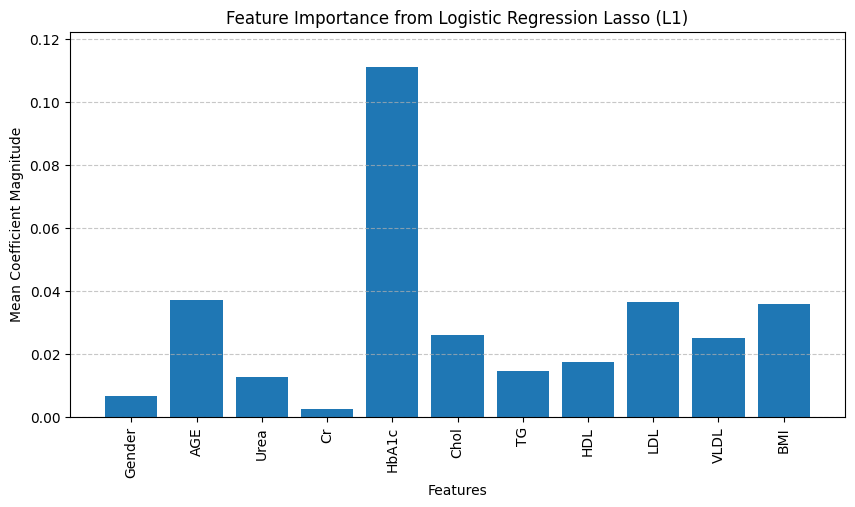

In [33]:
plt.figure(figsize=(10,5))
plt.bar(names, feature_importance)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Feature Importance from Logistic Regression Lasso (L1)")
plt.xlabel("Features")
plt.ylabel("Mean Coefficient Magnitude")
plt.ylim(0, feature_importance.max()*1.1)
plt.show()

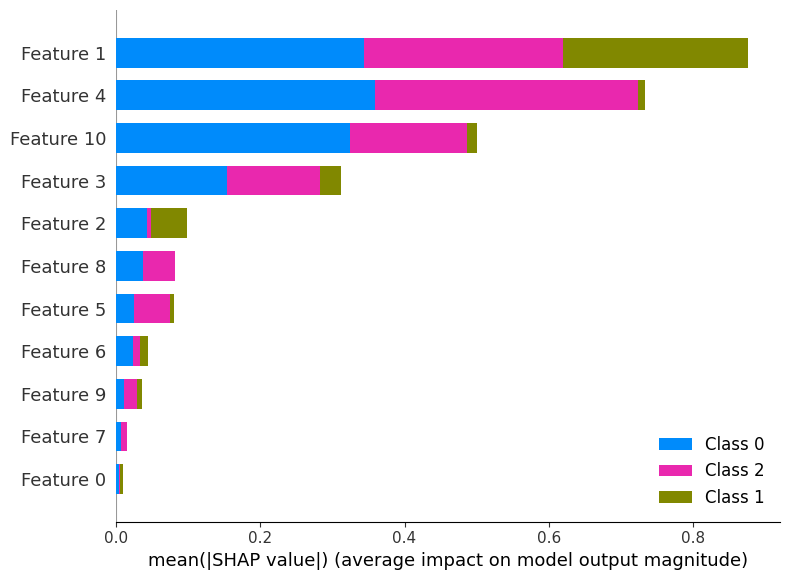

In [34]:
explainer = shap.Explainer(Multiclass_model , X)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

**Performing one vs all type**

Ridge type


use : One-vs-Rest ,
penalty :  L2 regularization (Ridge-style)


In [11]:
ridge_model=LogisticRegression(multi_class='ovr', penalty="l2", solver="lbfgs", max_iter=500)

ridge_model.fit(X, y)

/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'ovr'


In [12]:
coef_matrix = np.abs(ridge_model.coef_)  

In [13]:
feature_importance = coef_matrix.mean(axis=0)
names = df.drop("Class", axis=1).columns

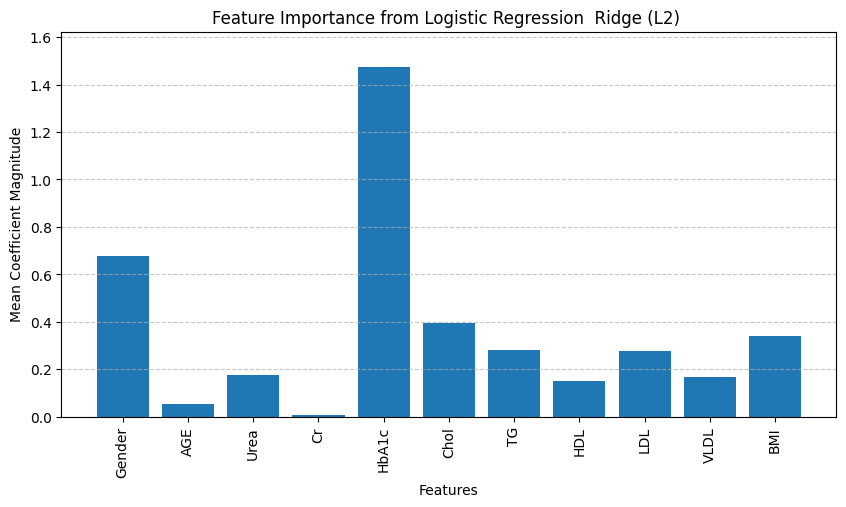

In [14]:
plt.figure(figsize=(10,5))
plt.bar(names, feature_importance)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Feature Importance from Logistic Regression  Ridge (L2) ")
plt.xlabel("Features")
plt.ylabel("Mean Coefficient Magnitude")
plt.ylim(0, feature_importance.max()*1.1)
plt.show()

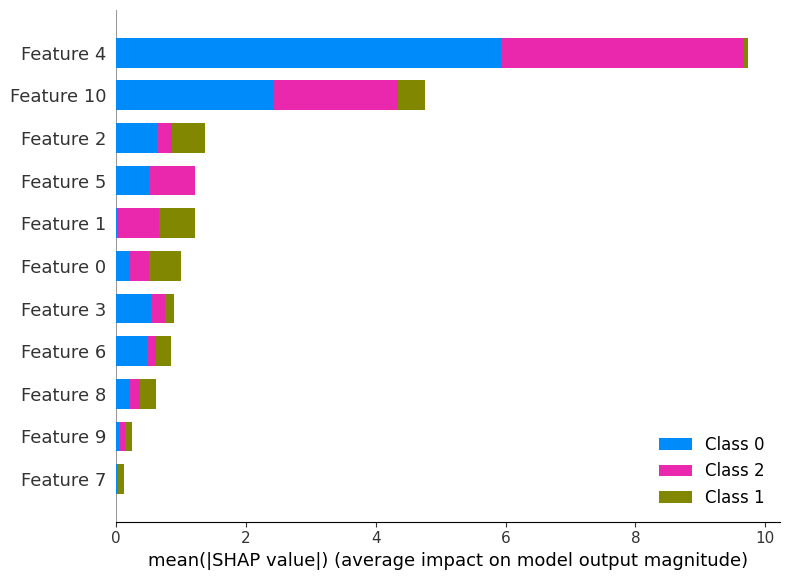

In [35]:
explainer = shap.Explainer(ridge_model , X)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

**Performing one vs all type**

Elastic Net


use : One-vs-Rest ,
penalty :  Elastic net 


In [36]:
elastic_model = LogisticRegression(
    multi_class='ovr',
    penalty="elasticnet",
    solver="saga",
    l1_ratio=0.5,  
    max_iter=500
)

elastic_model.fit(X,y)


/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mohankumarchinnasamy/Documents/my_test_works/ml_env/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warn

,penalty,'elasticnet'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'saga'
,max_iter,500
,multi_class,'ovr'


In [37]:
coef_matrix = np.abs(elastic_model.coef_)  

In [38]:
feature_importance = coef_matrix.mean(axis=0)
names = df.drop("Class", axis=1).columns

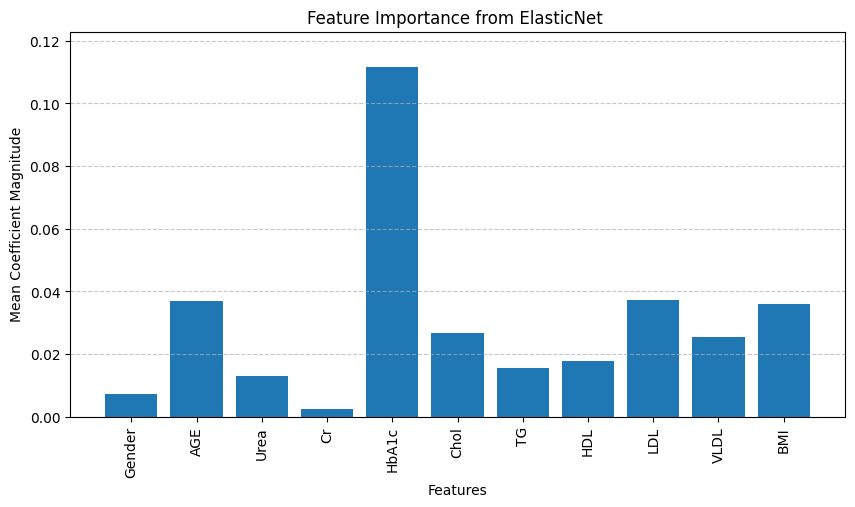

In [39]:
plt.figure(figsize=(10,5))
plt.bar(names, feature_importance)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Feature Importance from ElasticNet ")
plt.xlabel("Features")
plt.ylabel("Mean Coefficient Magnitude")
plt.ylim(0, feature_importance.max()*1.1)
plt.show()

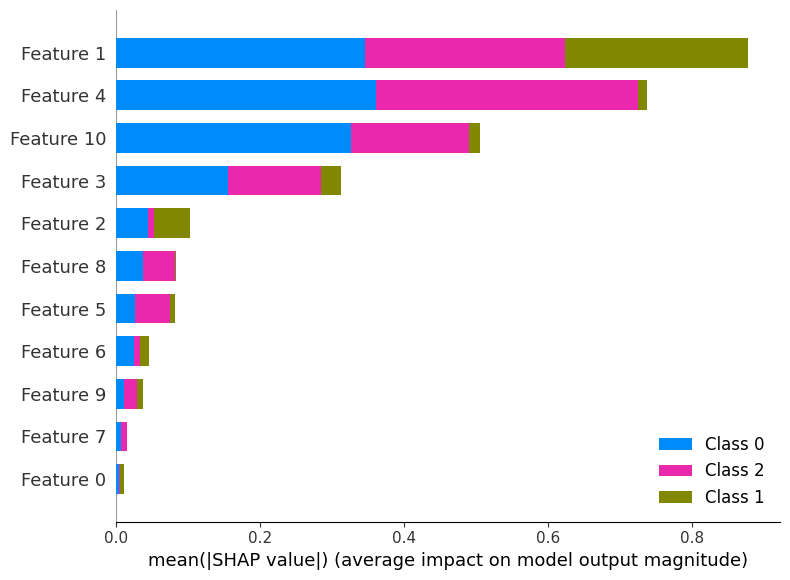

In [40]:
explainer = shap.Explainer(elastic_model , X)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)